In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LinearRegression,LogisticRegression,Ridge,RidgeClassifier,Lasso,LassoCV
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV,cross_validate,cross_val_score,cross_val_predict
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans,DBSCAN
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor,plot_tree
from sklearn.ensemble import AdaBoostClassifier,AdaBoostRegressor,BaggingClassifier,BaggingRegressor,GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error

In [3]:
#importing the necessary libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA

In [4]:
data=pd.read_csv("AirPassengers.csv")

In [5]:
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [6]:
data.shape

(144, 2)

In [7]:
data.describe()

,#Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [9]:
data['Month'] = pd.to_datetime(data['Month'])
data.head()

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [11]:
data.index = data['Month']
data.head()

,Month,#Passengers
Month,,
1949-01-01,1949-01-01,112
1949-02-01,1949-02-01,118
1949-03-01,1949-03-01,132
1949-04-01,1949-04-01,129
1949-05-01,1949-05-01,121


In [12]:
del data['Month']

In [13]:
data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


<AxesSubplot:xlabel='Month'>

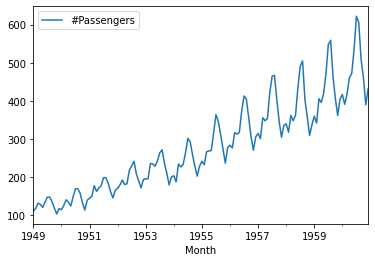

In [14]:
#plotting the time series
data.plot()

In [15]:
data.shape

(144, 1)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   #Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [17]:
mean_log = data.rolling(window=12).mean()
std_log = data.rolling(window=12).std()


In [18]:
mean_log.head()

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN


In [19]:
std_log.head()

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN


Text(0.5, 1.0, 'Rolling Mean & Standard Deviation (Logarithmic Scale)')

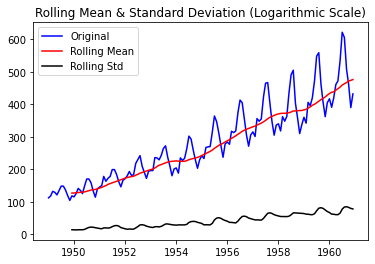

In [20]:

plt.plot(data, color='blue', label='Original')
plt.plot(mean_log, color='red', label='Rolling Mean')
plt.plot(std_log, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation (Logarithmic Scale)')

In [21]:
#checking the stationarity of the series 
from statsmodels.tsa.stattools import adfuller
result = adfuller(data['#Passengers'])
print(result)

(0.8153688792060423, 0.9918802434376409, 13, 130, {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}, 996.6929308390189)


<AxesSubplot:xlabel='Month'>

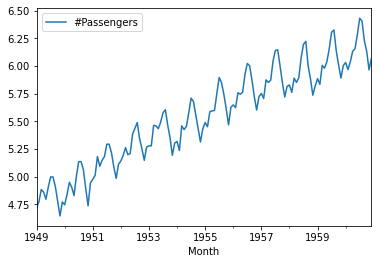

In [22]:
#logrithmic comutation to make the time series stationary
first_log = np.log(data)
first_log = first_log.dropna()         # dropping null values while taking low
first_log.plot()

In [23]:
#checking the stationarity of the series 
from statsmodels.tsa.stattools import adfuller
result = adfuller(first_log['#Passengers'])
print(result)

(-1.7170170891069714, 0.4223667747703857, 13, 130, {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}, -445.3990312497209)


Text(0.5, 1.0, 'Rolling Mean & Standard Deviation (Logarithmic Scale)')

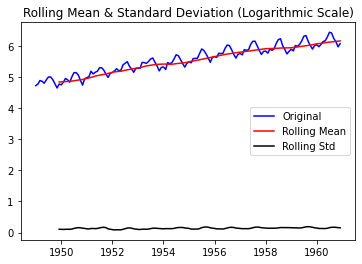

In [24]:
mean_log = first_log.rolling(window=12).mean()
std_log = first_log.rolling(window=12).std()

plt.plot(first_log, color='blue', label='Original')
plt.plot(mean_log, color='red', label='Rolling Mean')
plt.plot(std_log, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation (Logarithmic Scale)')

In [25]:
new_data = first_log - mean_log
new_data = new_data.dropna()
new_data.head()  

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142


In [26]:
#adfuller test for stationarity
result = adfuller(new_data['#Passengers'])
print(result)

(-3.162907991300871, 0.022234630001243004, 13, 119, {'1%': -3.4865346059036564, '5%': -2.8861509858476264, '10%': -2.579896092790057}, -436.63269481747034)


Text(0.5, 1.0, 'Rolling Mean & Standard Deviation (Logarithmic Scale)')

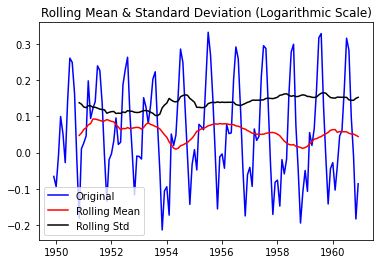

In [27]:
mean_log = new_data.rolling(window=12).mean()
std_log = new_data.rolling(window=12).std()

plt.plot(new_data, color='blue', label='Original')
plt.plot(mean_log, color='red', label='Rolling Mean')
plt.plot(std_log, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation (Logarithmic Scale)')

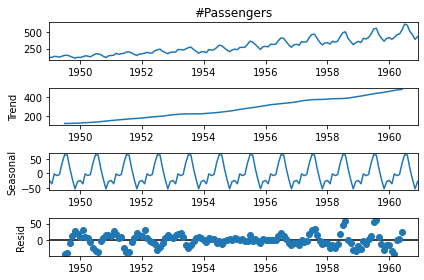

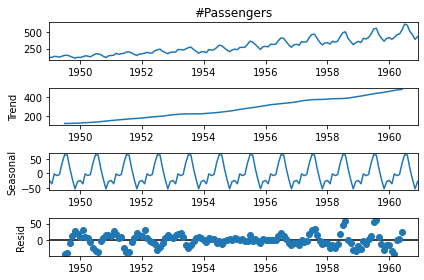

In [28]:
#seasonal Decompose
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_result = seasonal_decompose(data['#Passengers'].dropna())

decompose_result.plot()

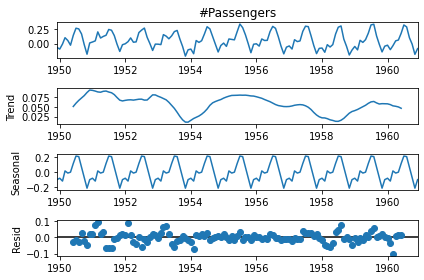

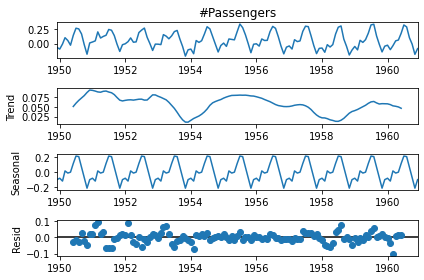

In [29]:
#seasonal Decompose
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_result = seasonal_decompose(new_data['#Passengers'].dropna())

decompose_result.plot()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


ValueError: Can only compute partial correlations for lags up to 50% of the sample size. The requested nlags 14 must be < 11.

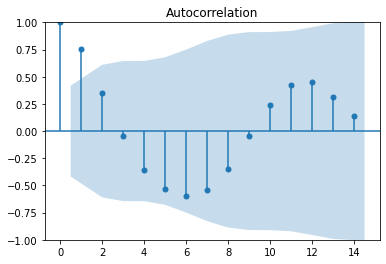

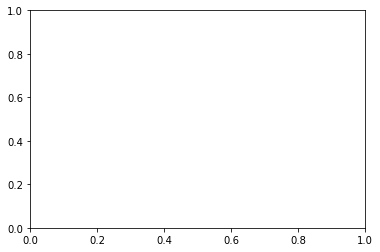

In [33]:
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
acf_plot=acf(new_data)
pacf_plot=pacf(new_data)
plot_acf(acf_plot)
plot_pacf(pacf_plot)

In [50]:
from statsmodels.tsa.arima.model import ARIMA

train = new_data.iloc[:120]['#Passengers']
test = new_data.iloc[121:]['#Passengers']

model = ARIMA(train, order=(1,0,2))
model_fit = model.fit()
model_fit.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            #Passengers   No. Observations:                  120
Model:                 ARIMA(1, 0, 2)   Log Likelihood                 117.901
Date:                Sun, 22 Jan 2023   AIC                           -225.803
Time:                        21:31:10   BIC                           -211.865
Sample:                    12-01-1949   HQIC                          -220.143
                         - 11-01-1959                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0538      0.022      2.446      0.014       0.011       0.097
ar.L1          0.4323      0.318      1.361      0.173      -0.190       1.055
ma.L1          0.5917      0.323      1.829      0.067      -0.042       1.226
ma.L2         -0.0778      0.279     -0.279      0.780      -0.625       0.469
sigma2         0.0081      0.002      4.769      0.000       0.005       0.011
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 6.02
Prob(Q):                              0.92   Prob(JB):                         0.05
Heteroskedasticity (H):               1.21   Skew:                            -0.08
Prob(H) (two-sided):                  0.55   Kurtosis:                         1.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [51]:
len(train)+len(test)- 1

131

In [52]:
len(train)+len(test)- 1

131

<AxesSubplot:xlabel='Month'>

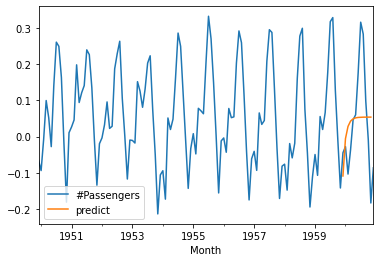

In [53]:
new_data['predict'] = model_fit.predict(start= len(train),       # takes 2 as q is given  2 so takes before 2 valuese to predict 3rd and so on so it cant start with 0
                                    end=len(train)+len(test)- 1, 
                                    dynamic=True)
new_data[['#Passengers','predict']].plot()

In [54]:
from statsmodels.tsa.statespace.sarimax import SARIMAX, SARIMAXResults

model = SARIMAX(train, order=(1,0,2), seasonal_order=(1,0,2,12))
model = model.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<AxesSubplot:xlabel='Month'>

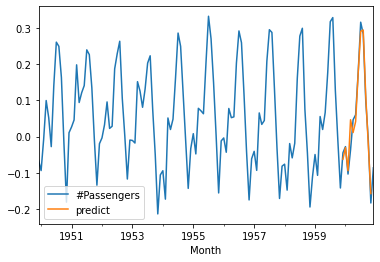

In [55]:
new_data['predict'] = model.predict(start= len(train) ,
                                                       end=len(train)+len(test)- 1, 
                                                       dynamic=True)
new_data[['#Passengers','predict']].plot()

<AxesSubplot:xlabel='Month'>

<Figure size 1440x432 with 0 Axes>

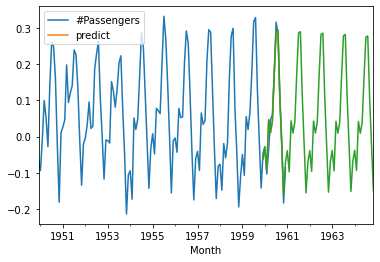

In [56]:
#predicting the projections for the next 5 years
plt.figure(figsize=(20,6))
forecast = model.forecast(steps=60)
new_data.plot()
forecast.plot()

In [59]:
forecast

1959-12-01   -0.062056
1960-01-01   -0.030151
1960-02-01   -0.093909
1960-03-01    0.046568
1960-04-01    0.011174
1960-05-01    0.041296
1960-06-01    0.173386
1960-07-01    0.290075
1960-08-01    0.293630
1960-09-01    0.111344
1960-10-01   -0.023565
1960-11-01   -0.156738
1960-12-01   -0.070694
1961-01-01   -0.038845
1961-02-01   -0.096926
1961-03-01    0.043592
1961-04-01    0.009806
1961-05-01    0.039742
1961-06-01    0.170749
1961-07-01    0.285530
1961-08-01    0.288951
1961-09-01    0.109478
1961-10-01   -0.023503
1961-11-01   -0.154936
1961-12-01   -0.069923
1962-01-01   -0.038493
1962-02-01   -0.095678
1962-03-01    0.042950
1962-04-01    0.009651
1962-05-01    0.039185
1962-06-01    0.168393
1962-07-01    0.281597
1962-08-01    0.284972
1962-09-01    0.107970
1962-10-01   -0.023180
1962-11-01   -0.152803
1962-12-01   -0.068961
1963-01-01   -0.037963
1963-02-01   -0.094361
1963-03-01    0.042359
1963-04-01    0.009518
1963-05-01    0.038646
1963-06-01    0.166075
1963-07-01 

In [ ]:
# since forecast doesnot make sense so we have to reverse transform  the data

In [60]:
from sklearn.metrics import mean_squared_error,mean_absolute_error      # since is the regression problems so we can use Regression metrics
mean_absolute_error(new_data["#Passengers"],new_data["predict"])

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [61]:
predict_df=new_data[120:131]
mean_absolute_error(predict_df["#Passengers"],predict_df["predict"])

0.021084735894044856

In [63]:
mean_squared_error(predict_df["#Passengers"],predict_df["predict"])


0.000912138968869474

In [64]:
mean_absolute_percentage_error(predict_df["#Passengers"],predict_df["predict"])


0.5219967622796683